In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import cv2 as cv2
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.callbacks import EarlyStopping

In [3]:
%pip install emnist

In [4]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [5]:
from emnist import extract_training_samples
from emnist import extract_test_samples
X_Train, y_Train = extract_training_samples('byclass')
X_Test, y_Test = extract_test_samples('byclass')

In [6]:
X_Train = X_Train/255.
X_Test = X_Test/255.

In [7]:
X_Train.shape

(697932, 28, 28)

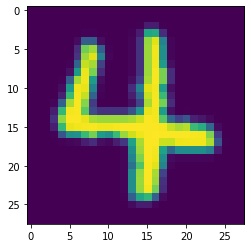

In [8]:
plt.imshow(X_Train[55555])

In [9]:
X_Test.shape

(116323, 28, 28)

In [10]:
X_Train = np.reshape(X_Train, ( 697932,28,28,1))

In [11]:
X_Test = np.reshape(X_Test, ( 116323,28,28,1))

In [12]:
import tensorflow as tf

In [13]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [14]:
number_of_classes = 62

y_Train = tf.keras.utils.to_categorical(y_Train, number_of_classes)
y_Test = tf.keras.utils.to_categorical(y_Test, number_of_classes)

In [15]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(5,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 4, restore_best_weights = True)

In [18]:
history = model.fit(X_Train,y_Train,epochs=100,batch_size=2048,validation_data=(X_Test,y_Test),callbacks=[es])

Epoch 1/100
341/341 [==============================] - 19s 28ms/step - loss: 0.8903 - accuracy: 0.7475 - val_loss: 0.5167 - val_accuracy: 0.8265
Epoch 2/100
341/341 [==============================] - 8s 24ms/step - loss: 0.4711 - accuracy: 0.8378 - val_loss: 0.4484 - val_accuracy: 0.8428
Epoch 3/100
341/341 [==============================] - 9s 25ms/step - loss: 0.4200 - accuracy: 0.8507 - val_loss: 0.4209 - val_accuracy: 0.8511
Epoch 4/100
341/341 [==============================] - 8s 25ms/step - loss: 0.3923 - accuracy: 0.8580 - val_loss: 0.4080 - val_accuracy: 0.8542
Epoch 5/100
341/341 [==============================] - 8s 25ms/step - loss: 0.3741 - accuracy: 0.8625 - val_loss: 0.4029 - val_accuracy: 0.8553
Epoch 6/100
341/341 [==============================] - 10s 30ms/step - loss: 0.3584 - accuracy: 0.8675 - val_loss: 0.3973 - val_accuracy: 0.8562
Epoch 7/100
341/341 [==============================] - 9s 27ms/step - loss: 0.3450 - accuracy: 0.8712 - val_loss: 0.3954 - val_accurac

In [19]:
def summarize_diagnostics(history):
  #plot loss
  plt.subplot(211)
  plt.title("Cross Entropy Loss")
  plt.plot(history.history['loss'],color="blue",label="train")
  plt.plot(history.history['accuracy'],color="orange",label="test")
  # plt.plot(history.history['val_loss'],color="orange",label="test")
  # plot accuracy
  plt.subplot(212)
  plt.title("Classification Accuracy")
  plt.plot(history.history['accuracy'],color="blue",label="train")
  plt.plot(history.history['val_accuracy'],color="orange",label="test")
  #save plot to file
  #filename = sys.argv[0].split('/')[-1]
  #plt.savefile(filename+" plot.png")
  #plt.close()
  plt.show()

In [20]:
score = model.evaluate(X_Test,y_Test)
print(score[0])
print(score[1])

3636/3636 [==============================] - 15s 4ms/step - loss: 0.3995 - accuracy: 0.8579
0.3995002806186676
0.8578870892524719


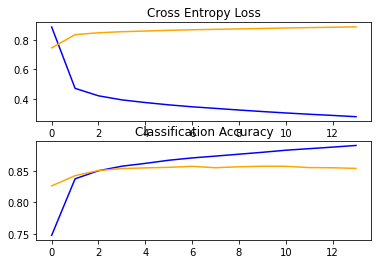

In [21]:
summarize_diagnostics(history)

In [22]:
Model_path = "/content/gdrive/MyDrive/vision/captcha/model"
model_f = os.path.join(Model_path,"letter_num_cf.h5")
#Saving the weigths of the model
model.save(model_f)

In [23]:
from keras.models import model_from_json
json_model = model.to_json()
model_j = os.path.join(Model_path,"letter_num_cf.h5.json")
# save the model architecture (metadata) to JSON file
with open(model_j,"w") as json_file:
  json_file.write(json_model)

Confusion Matrix
Normalized confusion matrix


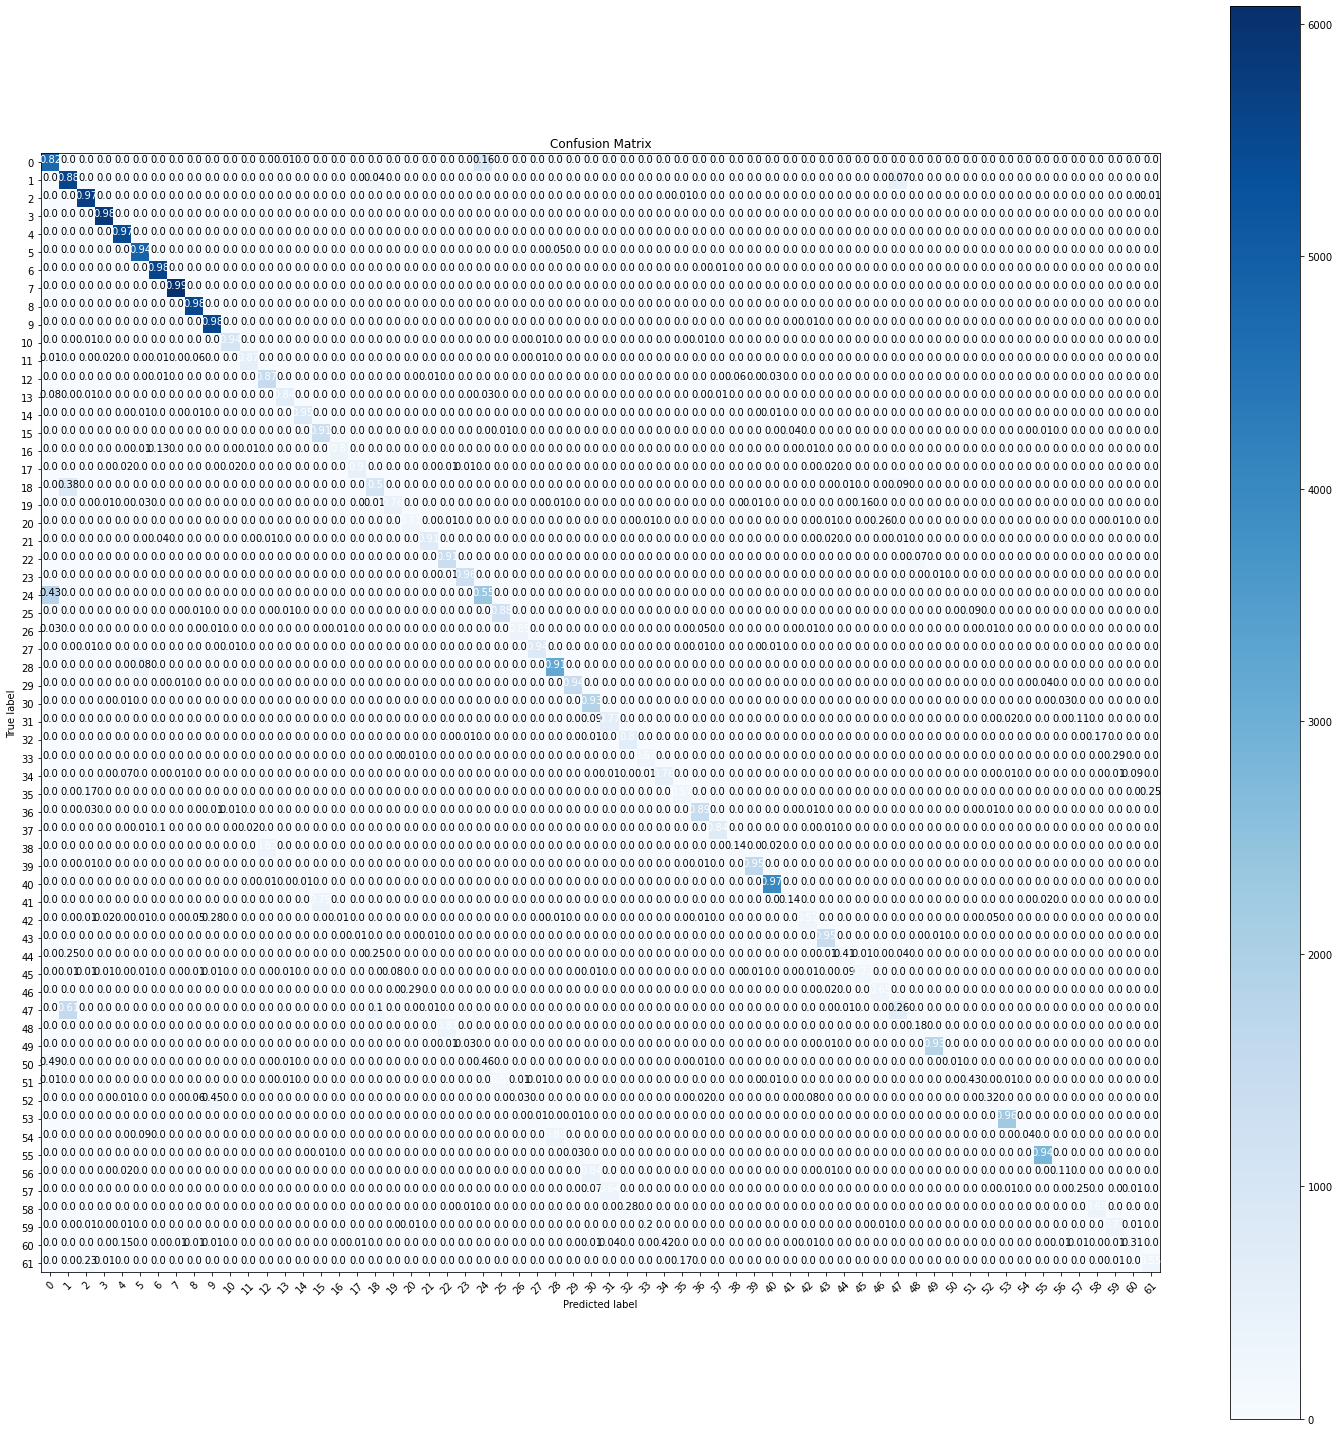

In [24]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for i in range(number_of_classes):
    target_names.append(i)
# print(target_names)
#Confution Matrix
Y_pred = model.predict(X_Test)
y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(y_Test, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')